# Modeling

We decided to **split the noebooks** in order to be faster, since we don't need graphs anymore.

In [2]:
import pandas as pd

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
df = pd.read_parquet("https://github.com/maikuvit/Space-Capybaras-Final-Project/raw/main/train_clean.parquet")
# LOCAL FILE! 
# df = pd.read_parquet("train_clean.parquet")
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,GarageArea,GrLivArea,LotFrontage,OpenPorchSF,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,856,854,3,706,1,150,548,1710,65,61,...,False,False,False,False,False,False,False,False,False,False
1,1262,0,3,978,0,284,460,1262,80,0,...,False,False,False,False,False,False,False,False,False,True
2,920,866,3,486,1,434,608,1786,68,42,...,False,False,False,False,False,False,False,False,False,False
3,961,756,3,216,1,540,642,1717,60,35,...,False,False,False,False,False,False,False,False,False,False
4,1145,1053,4,655,1,490,836,2198,84,84,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,3,0,0,953,460,1647,62,40,...,False,False,False,False,False,False,False,False,False,False
1456,2073,0,3,790,1,589,500,2073,85,0,...,False,False,False,False,False,False,False,False,False,False
1457,1188,1152,4,275,0,877,252,2340,66,60,...,False,False,False,False,False,False,False,False,False,False
1458,1078,0,2,49,1,0,240,1078,68,0,...,False,False,False,False,False,False,False,False,False,False


## Model creation

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(df.drop(['SalePrice'], axis=1).values)
y = np.array(df['SalePrice'].values)


seed = 242423
test_size = .3
val_size = .2

#Split train e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)


### Resampling for high class label

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=seed, sampling_strategy='minority')
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


### Model creation

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [9]:
# create a model for each sampling method
models = []
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('AB', AdaBoostClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=seed)))
models.append(('SVC', SVC(random_state=seed, kernel="poly",gamma=2,probability=True, class_weight={ 'HIGH': 2} )))


In [10]:
results = []
names = []

for name, model in models:
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    results.append([accuracy, precision, recall, f1score, confusion_matrix(y_test, y_pred)])
    names.append(name)

Data frame containing the evaluation parameters for the models

In [11]:
df_results = pd.DataFrame(results, columns=['accuracy', 'precision', 'recall', 'f1-score', 'confusion_matrix'], index=names)
df_results

,accuracy,precision,recall,f1-score,confusion_matrix
RF,0.865297,0.865407,0.865297,0.863549,"[[27, 0, 15], [0, 161, 17], [4, 23, 191]]"
GB,0.851598,0.851724,0.851598,0.851138,"[[31, 0, 11], [0, 156, 22], [5, 27, 186]]"
AB,0.801370,0.802674,0.801370,0.798848,"[[25, 0, 17], [0, 159, 19], [7, 44, 167]]"
NB,0.636986,0.730413,0.636986,0.653333,"[[37, 0, 5], [2, 143, 33], [93, 26, 99]]"
KNN,0.780822,0.797325,0.780822,0.783853,"[[35, 0, 7], [3, 131, 44], [24, 18, 176]]"
DT,0.778539,0.779152,0.778539,0.778806,"[[29, 0, 13], [0, 143, 35], [15, 34, 169]]"
SVC,0.773973,0.776810,0.773973,0.774937,"[[30, 2, 10], [1, 142, 35], [18, 33, 167]]"


Confusion matrix for each model

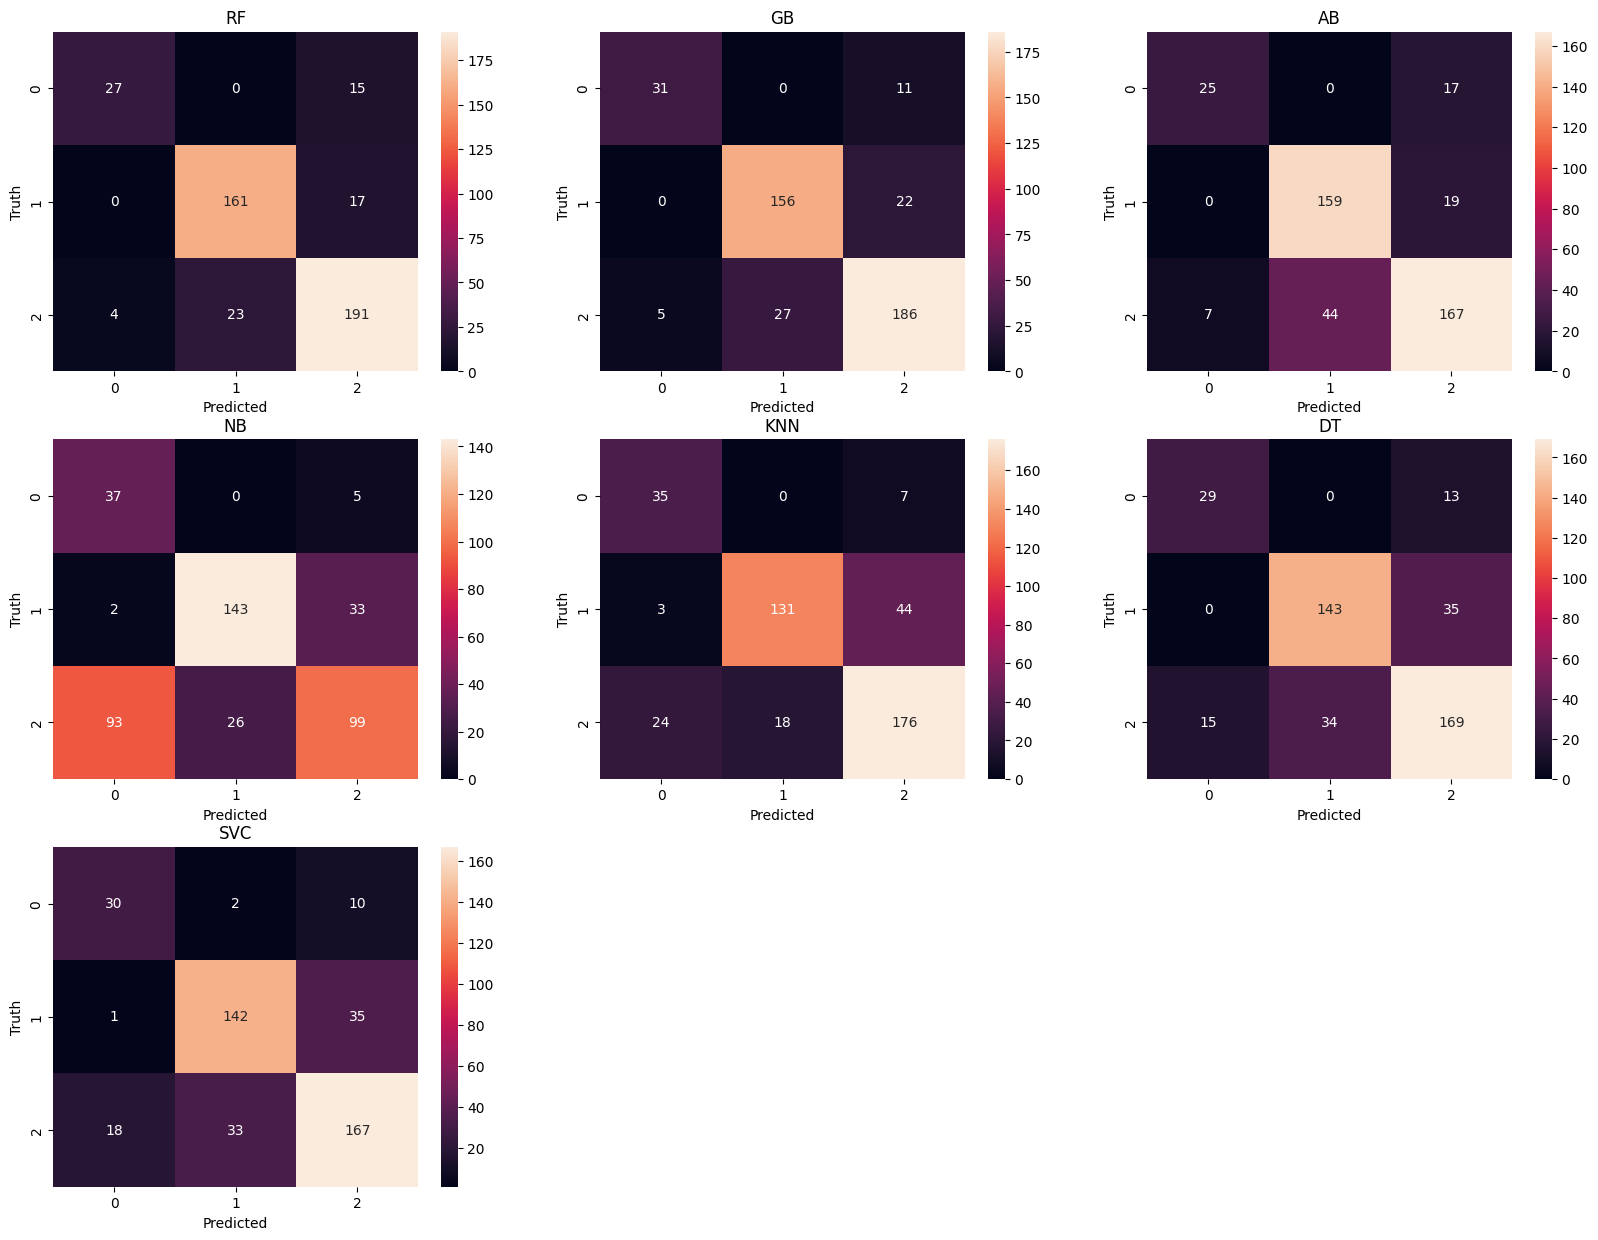

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i, (name, model) in enumerate(models):
    row = i // 3
    col = i % 3
    axes[row, col].set_title(name)
    sb.heatmap(results[i][4], annot=True, fmt='d', cmap='rocket', ax=axes[row, col])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Truth')

axes[2,1].remove()
axes[2,2].remove()
plt.show()


Running a K-FOLD validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score


kfold_results = pd.DataFrame()

for name, model in models:
    kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
    kfold_results[name] = cv_results

In [ ]:
kfold_results

,RF,GB,AB,NB,KNN,DT,SVC
0,0.924658,0.931507,0.808219,0.773973,0.835616,0.876712,0.897260
1,0.900685,0.914384,0.815068,0.732877,0.828767,0.849315,0.856164
2,0.924399,0.914089,0.725086,0.793814,0.828179,0.855670,0.855670
3,0.920962,0.917526,0.835052,0.804124,0.852234,0.855670,0.879725
4,0.914089,0.910653,0.835052,0.721649,0.817869,0.841924,0.886598


Box plot for K-Fold results

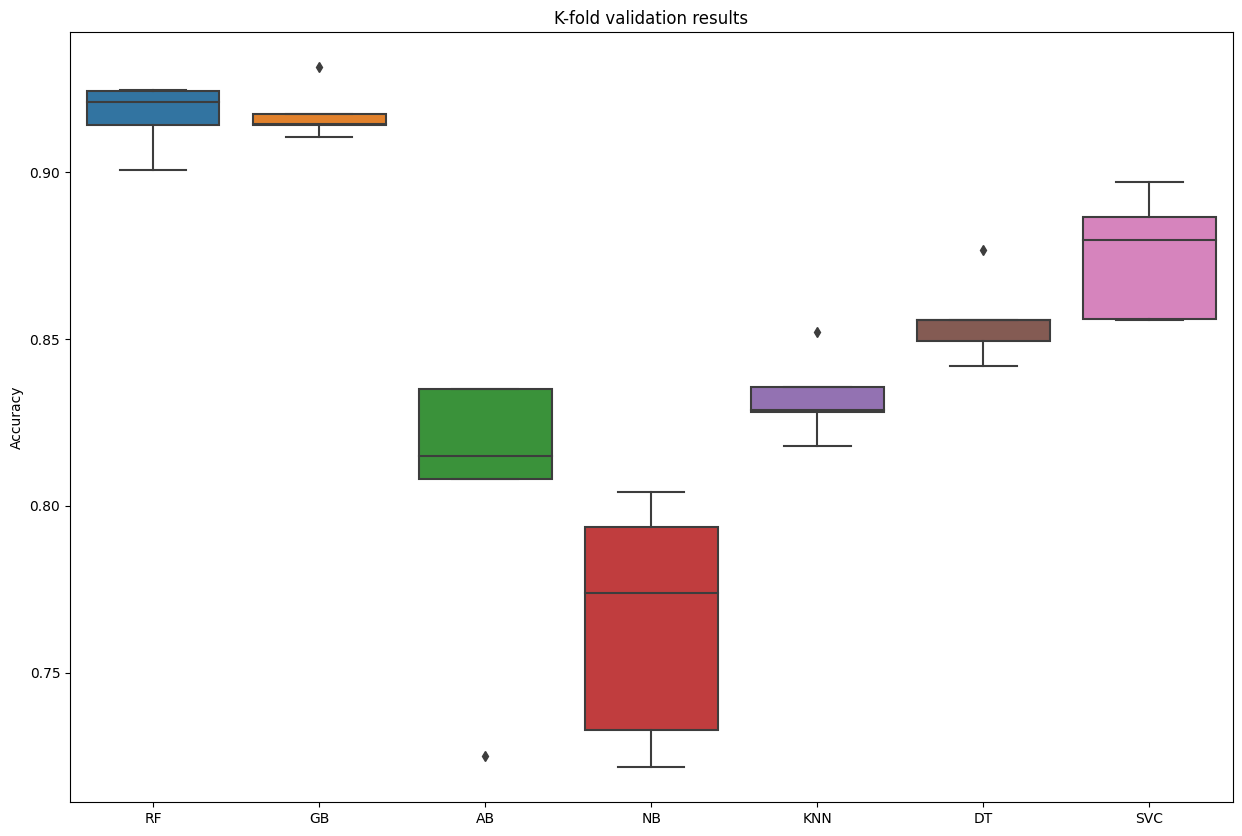

In [ ]:

fig, ax = plt.subplots(figsize=(15, 10))
sb.boxplot(data=kfold_results, ax=ax)
ax.set_title('K-fold validation results')
ax.set_ylabel('Accuracy')
plt.show()


## Feature selection try

In [ ]:
#Try to find the best features based on the dataset

from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(x_train_smote, y_train_smote)
support = fit.get_support()
feature_list = list(df.drop(['SalePrice'], axis=1).columns)

best_features = []
for i in range(len(support)):
    if support[i]:
        best_features.append(feature_list[i])

best_features

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GrLivArea',
 'LotFrontage',
 'OpenPorchSF',
 'WoodDeckSF',
 'BsmtQual_Ex']

In [ ]:
#using the new list of features, create a new dataframe with only the best features

df_best_features = df[best_features]
df_best_features['SalePrice'] = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(df_best_features.drop(['SalePrice'], axis=1), df_best_features['SalePrice'], test_size=0.2, random_state=seed)

#Oversample
smote = SMOTE(random_state=seed)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)



<ipython-input-16-4fd943270f05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_features['SalePrice'] = df['SalePrice']


Train the model on the new dataset

In [ ]:
#create a list of pruned models using the same parameters as before
models_pruned = []
names_pruned = []
results_pruned = []
names_pruned = []
kfold_pruned = []

models_pruned.append(('RF', RandomForestClassifier(random_state=seed)))
models_pruned.append(('GB', GradientBoostingClassifier(random_state=seed)))
models_pruned.append(('AB', AdaBoostClassifier(random_state=seed)))
models_pruned.append(('NB', GaussianNB()))
models_pruned.append(('KNN', KNeighborsClassifier()))
models_pruned.append(('DT', DecisionTreeClassifier(random_state=seed)))
models_pruned.append(('SVC', SVC(random_state=seed, kernel="poly",gamma=2, class_weight={ 'HIGH': 2}, probability=True)))

In [ ]:
for name, model_p in models_pruned:
    model_p.fit(x_train_smote, y_train_smote)
    y_pred = model_p.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    results_pruned.append([accuracy, precision, recall, f1score, confusion_matrix(y_test, y_pred)])
    names_pruned.append(name)


In [ ]:
df_results_pruned = pd.DataFrame(results_pruned, names_pruned, columns=['accuracy', 'precision', 'recall', 'f1score', 'confusion_matrix'])
df_results_pruned

Run K-Fold validation on the model trained on the pruned dataset

In [ ]:
kfold_results_pruned = pd.DataFrame()

for name, model in models_pruned:
    kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
    kfold_results_pruned[name] = cv_results

In [ ]:
kfold_results_pruned

Box plots for the k-folds results

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.boxplot(data=kfold_results_pruned, ax=ax)
ax.set_title('K-fold validation results from pruned models')
ax.set_ylabel('Accuracy')
plt.show()

### New confusion matrixes

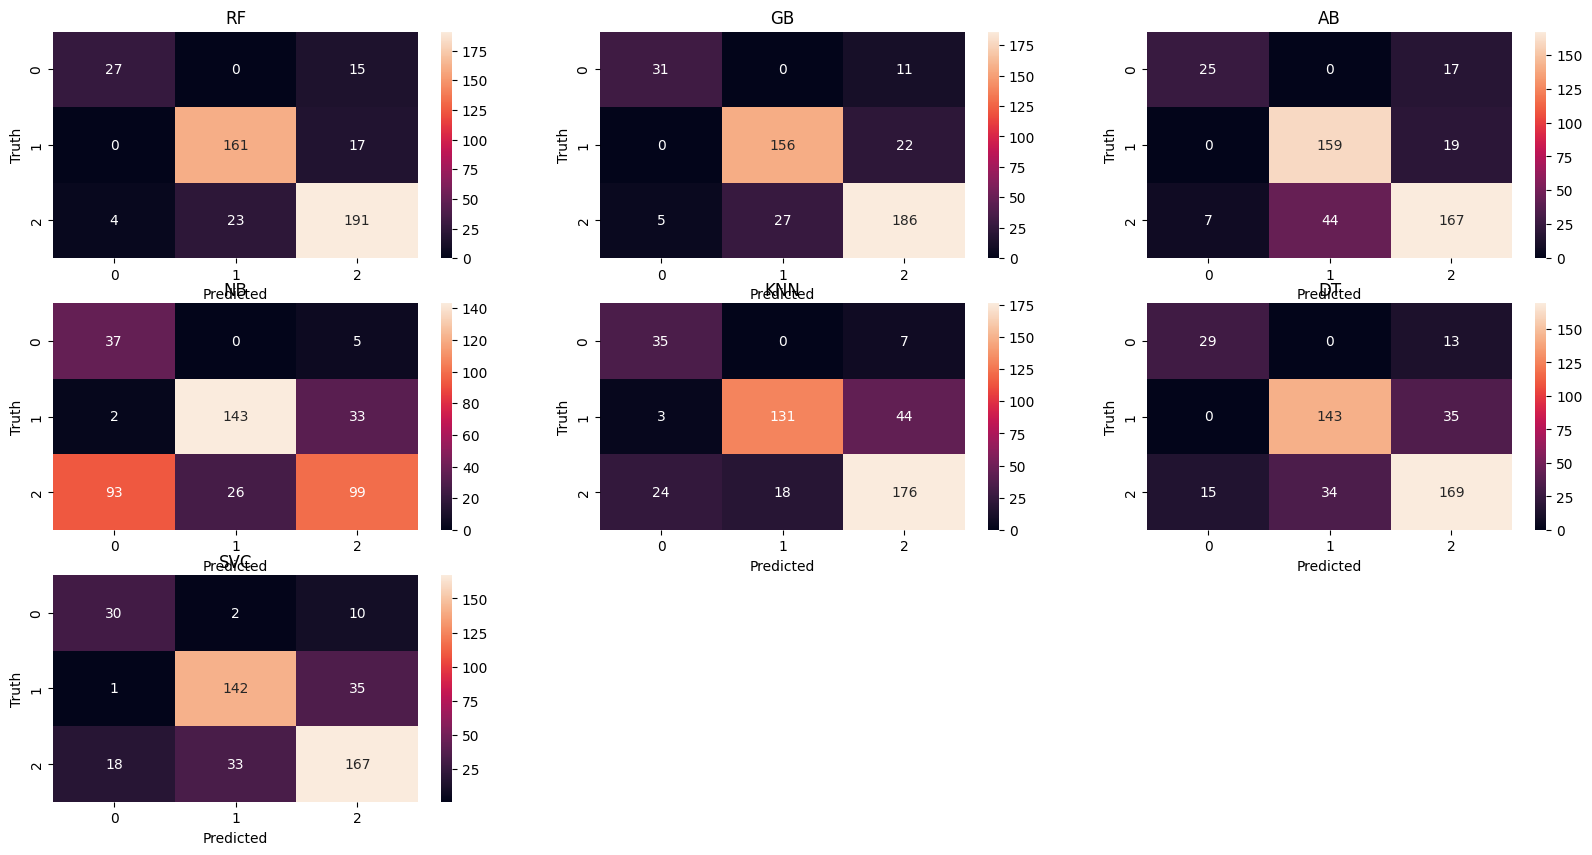

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for i, (name, model) in enumerate(models):
    row = i // 3
    col = i % 3
    axes[row, col].set_title(name)
    sb.heatmap(results[i][4], annot=True, fmt='d', cmap='rocket', ax=axes[row, col])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Truth')
axes[2,1].remove()
axes[2,2].remove()
plt.show()


# Model Evaluation

In [ ]:
#split data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

#oversample the train data using SMOTE
smote = BorderlineSMOTE(random_state=seed)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


## ROC

In [ ]:
from sklearn.metrics import roc_curve, auc 
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
probs = []
for name, model in models:
    model.fit(x_train_smote, y_train_smote)
    print(name)
    probs.append(model.predict_proba(x_test))


RF
GB
AB
NB
KNN
DT
SVC


In [ ]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['SalePrice']))

In [ ]:
probs = []
for name, model in models:
    model.fit(x_train_smote, y_train_smote)
    probs.append(model.predict_proba(x_test))


In [ ]:
plt.style.use('seaborn-v0_8-deep')

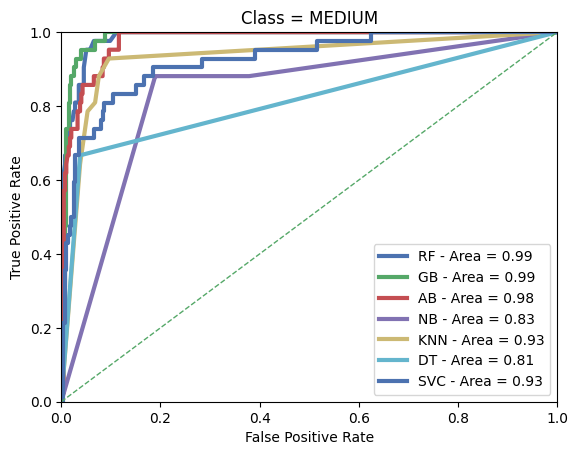

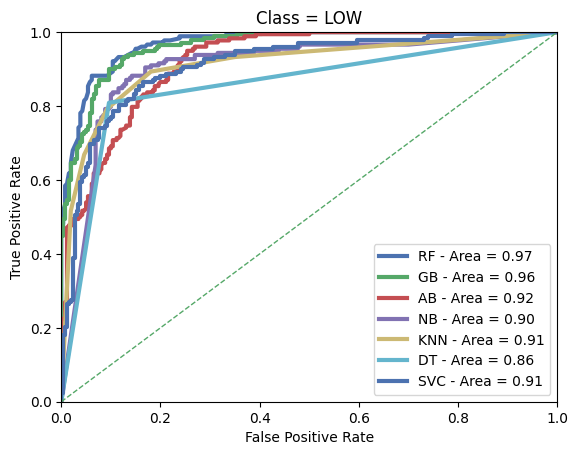

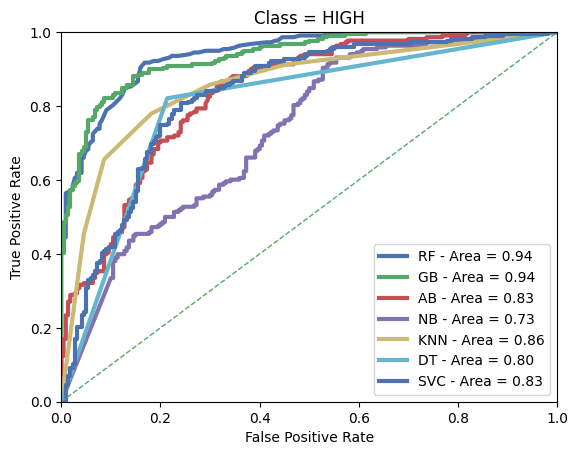

In [ ]:
falsepositiverate = dict()
truepositiverate = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0
    for name, _ in models:
        falsepositiverate[i], truepositiverate[i], _ = roc_curve(one_hot_encoding[:,i], probs[m][:,i])

        roc_auc[i] = auc(falsepositiverate[i], truepositiverate[i])
        
        plt.plot(falsepositiverate[i], truepositiverate[i], lw=3, label=f"{name} - Area = {roc_auc[i]:.2f}")
        m += 1
    
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    
    plt.title(f'Class = {str(np.unique(y)[2-i])}')
    plt.legend(loc='lower right')

    plt.show()
